In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [93]:
pip install pandas numpy matplotlib seaborn openpyxl


In [94]:
file_path = "Python Updated Data analyst Data (1).xlsx"
df = pd.read_excel(file_path)


In [95]:
df.head()
df.info()
df.shape


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4894 entries, 0 to 4893
Data columns (total 16 columns):
 #   Column                                                           Non-Null Count  Dtype  
---  ------                                                           --------------  -----  
 0   First Name                                                       4894 non-null   object 
 1   Email ID                                                         4894 non-null   object 
 2   Quantity                                                         4894 non-null   int64  
 3   Events                                                           4894 non-null   object 
 4   Attendee Status                                                  4894 non-null   object 
 5   College Name                                                     4879 non-null   object 
 6   How did you come to know about this event?                       2678 non-null   object 
 7   Specify in "Others" (how did you come to k

(4894, 16)

In [96]:
df.columns


Index(['First Name', 'Email ID', 'Quantity', 'Events', 'Attendee Status',
       'College Name', 'How did you come to know about this event?',
       'Specify in "Others" (how did you come to know about this event)',
       'Designation', 'Year of Graduation', 'City', 'CGPA',
       'Experience with python (Months)', 'Family Income',
       'Expected salary (Lac)', 'Leadership- skills'],
      dtype='object')

In [97]:
df = df.drop_duplicates(subset="Email ID")


In [98]:
df.isnull().sum()


,0
First Name,0
Email ID,0
Quantity,0
Events,0
Attendee Status,0
College Name,10
How did you come to know about this event?,1082
"Specify in ""Others"" (how did you come to know about this event)",2116
Designation,0
Year of Graduation,0


In [99]:
df[num_cols].dtypes


,0
Quantity,int64
CGPA,float64
Experience with python (Months),int64
Family Income,object
Expected salary (Lac),int64


In [100]:
income_mapping = {
    '0-2 Lakh': 1,
    '2-5 Lakh': 3.5,
    '5-7 Lakh': 6,
    '7 Lakh+': 8
}

df['Family Income'] = df['Family Income'].map(income_mapping)


In [101]:
num_cols = ['Quantity','CGPA','Experience with python (Months)',
            'Family Income','Expected salary (Lac)']

df[num_cols] = df[num_cols].fillna(df[num_cols].median())


In [102]:
cat_cols = ['City','College Name','Attendee Status','Leadership- skills']
df[cat_cols] = df[cat_cols].fillna("Unknown")


Q1️ How many unique students are included?

In [103]:
df['Email ID'].nunique()


2157

Q2️ What is the average CGPA?

In [104]:
df['CGPA'].mean()


np.float64(8.028233657858136)

Distribution across graduation years


In [105]:
df['Year of Graduation'].value_counts().sort_index()


,count
Year of Graduation,
2023,676
2024,679
2025,565
2026,237


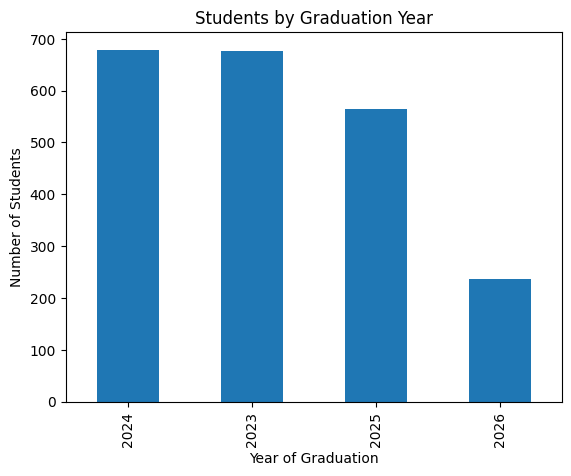

In [106]:
plt.figure()
df['Year of Graduation'].value_counts().plot(kind='bar')
plt.xlabel("Year of Graduation")
plt.ylabel("Number of Students")
plt.title("Students by Graduation Year")
plt.show()


Distribution of Python experience

In [107]:
df['Experience with python (Months)'].describe()


,Experience with python (Months)
count,2157.000000
mean,5.152990
std,1.581947
min,3.000000
25%,4.000000
50%,5.000000
75%,7.000000
max,8.000000


Average family income

In [108]:
df['Family Income'].mean()


np.float64(1.3034306907742235)

GPA variation among colleges (Top 5)

In [109]:
df.groupby('College Name')['CGPA'].mean().sort_values(ascending=False).head(5)


,CGPA
College Name,
St Xavier's College,8.795000
New horizon institute of Technology and Management,8.611765
"B. K. Birla College of Arts, Science & Commerce (Autonomous), Kalyan",8.566667
AP SHAH INSTITUTE OF TECHNOLOGY,8.360000
"THAKUR INSTITUTE OF MANAGEMENT STUDIES, CAREER DEVELOPMENT & RESEARCH - [TIMSCDR]",8.325000


Outliers in Quantity

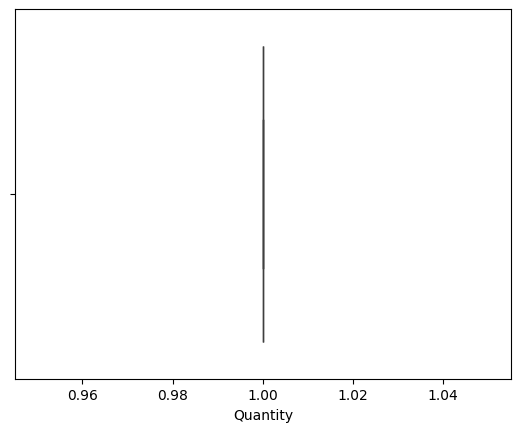

In [110]:
sns.boxplot(x=df['Quantity'])
plt.show()


Average CGPA by city

In [111]:
df.groupby('City')['CGPA'].mean().sort_values(ascending=False)


,CGPA
City,
Delhi,9.014286
Raipur,8.980000
Sonipat,8.712500
konark,8.540000
Karnal,8.533333
...,...
Dhar,7.312500
Darbhanga,7.300000
New Delhi,7.142857


**MODERATE QUESTIONS**

Expected Salary vs GPA, Income & Python Experience

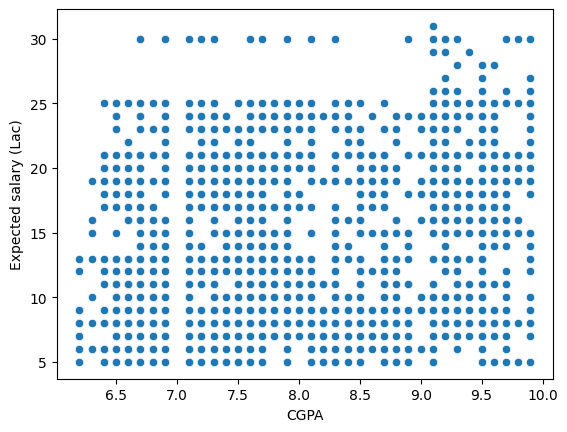

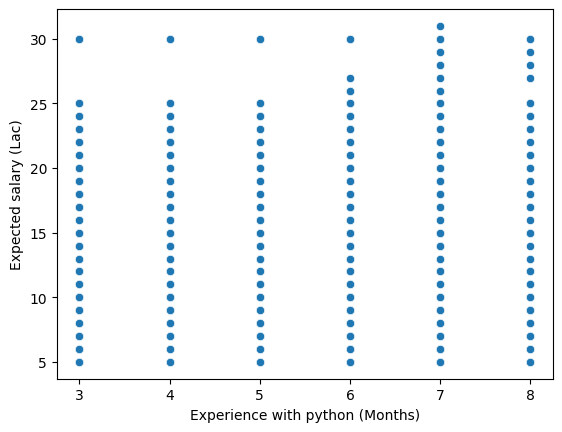

In [112]:
sns.scatterplot(data=df, x='CGPA', y='Expected salary (Lac)')
plt.show()
sns.scatterplot(data=df, x='Experience with python (Months)',
                y='Expected salary (Lac)')
plt.show()


Which event attracts more students?

In [113]:
df['Events'].value_counts().head()


,count
Events,
Internship Program(IP) Success Conclave,657
Art of Resume Building,336
Hello ML and DL,233
Data Visualization using Power BI,225
Talk on Skill and Employability Enhancement,194


Q12️ Leadership vs GPA

In [114]:
df.groupby('Leadership- skills')['CGPA'].mean()


,CGPA
Leadership- skills,
no,8.043339
no,8.006061
yes,8.012784


Q13️ Leadership vs Expected Salary

In [115]:
df.groupby('Leadership- skills')['Expected salary (Lac)'].mean()


,Expected salary (Lac)
Leadership- skills,
no,13.620242
no,14.272727
yes,13.754261


Students graduating by end of 2024

In [116]:
df[df['Year of Graduation'] <= 2024].shape[0]


1355

Q15️ Best promotion channel

In [117]:
df['How did you come to know about this event?'].value_counts()


,count
How did you come to know about this event?,
Whatsapp,434
Email,227
Others,89
Cloud Counselage Website,64
SPOC/ College Professor,55
LinkedIn,27
Facebook,21
Youtube,17
Whatsapp | Email,14


Q16️ Students attended Data Science events

In [118]:
df[df['Events'].str.contains("Data", case=False, na=False)].shape[0]


225

Q17️ High CGPA & Experience → Salary Expectation

In [119]:
df[df['CGPA'] >= 8].groupby('Experience with python (Months)')['Expected salary (Lac)'].mean()


,Expected salary (Lac)
Experience with python (Months),
3,13.966184
4,13.835294
5,12.916058
6,15.292683
7,16.767635
8,16.113208


Q18️ Awareness by college (Top 5)

In [120]:
df['College Name'].value_counts().head(5)


,count
College Name,
"priyadarshini college of engineering, nagpur",93
"ld college of engineering, ahmedabad, gujarat",92
"vidyalankar institute of technology, mumbai",92
"b. k. birla college of arts, science & commerce (autonomous), kalyan",79
government polytechnic gandhinagar,79


Correlation Analysis


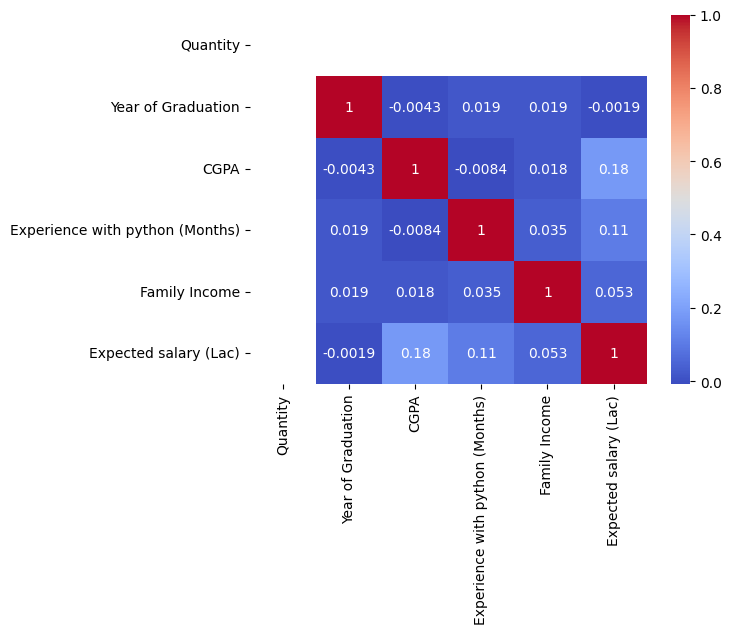

In [121]:
df[['CGPA','Family Income','Experience with python (Months)',
    'Expected salary (Lac)']].corr()
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.show()
